<a href="https://colab.research.google.com/github/sanalexito/itrees/blob/main/iTrees1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Voy a cargar mis datos. Primero los pongo en la carpeta de sample data

import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv('/content/sample_data/dataset1.csv')
print(data.shape)
mis_datos = data.iloc[:,1:6]



(688, 6)


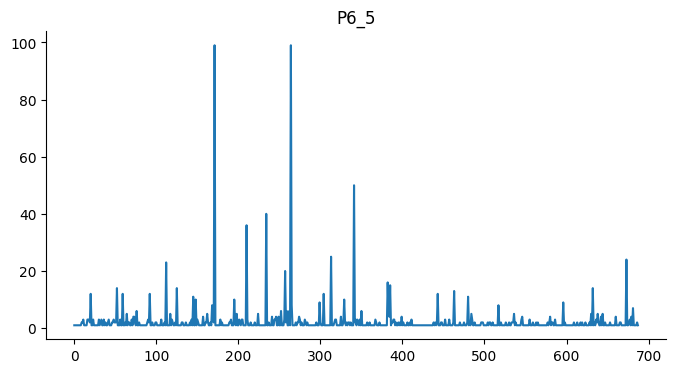

In [2]:
# En este gráfico podemos mirar que existen dos informantes que tuvieron
# una cantidad de actos de corrupción demasiado grande (P6_5)
from matplotlib import pyplot as plt
mis_datos['P6_5'].plot(kind='line', figsize=(8, 4), title='P6_5')
plt.gca().spines[['top', 'right']].set_visible(False)

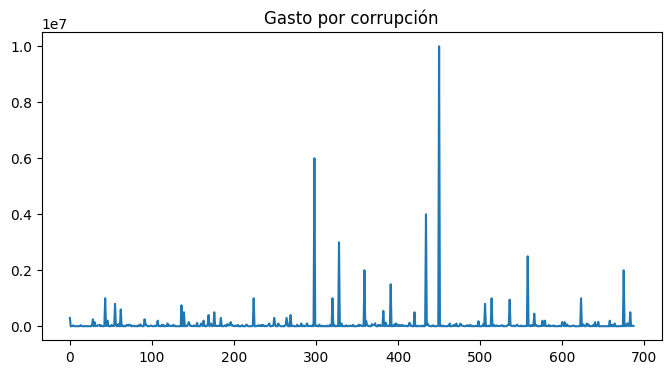

In [3]:
from matplotlib import pyplot as plt
mis_datos['P6_7'].plot(kind='line', figsize=(8, 4), title='Gasto por corrupción')
plt.gca().spines[['top', 'right']].set_visible(True)

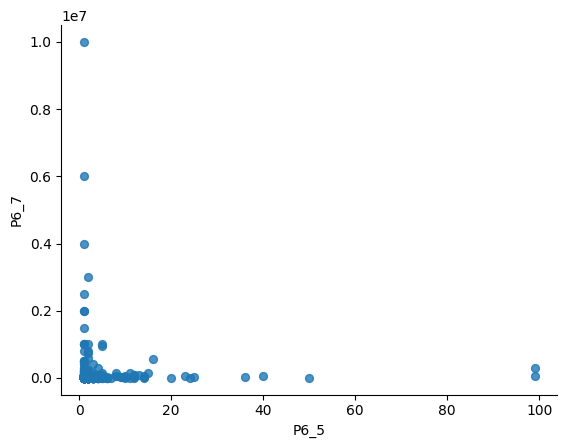

In [4]:
# Si nos fijamos en la siguiente gráfica podemos mirar que en efecto existen informantes
# que podemos considerar atípicos
from matplotlib import pyplot as plt
mis_datos.plot(kind='scatter', x='P6_5', y='P6_7', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# Voy a usar el método de iTrees para detectar si en efecto estos informantes son datos atípicos.
# Para esto es necesario normalizar los datos como primer acercamiento

**Caso del método Min Max**

In [6]:
mis_datos.shape
datos = mis_datos.iloc[:,3:5]
datos_min_max = preprocessing.MinMaxScaler().fit_transform(datos)
datos_min_max

array([[0.00000000e+00, 2.99951500e-02],
       [0.00000000e+00, 4.50002250e-05],
       [0.00000000e+00, 9.50004750e-05],
       ...,
       [0.00000000e+00, 2.49501248e-03],
       [1.02040816e-02, 1.99500998e-03],
       [0.00000000e+00, 9.95004975e-04]])

**Caso de Normalización en función de la norma**

In [7]:
# Usa la norma L2
datos_normalizer = preprocessing.Normalizer(norm='l2').fit_transform(datos)
datos_normalizer

array([[3.33333333e-06, 1.00000000e+00],
       [1.99999600e-03, 9.99998000e-01],
       [9.99999500e-04, 9.99999500e-01],
       ...,
       [4.00000000e-05, 9.99999999e-01],
       [9.99999995e-05, 9.99999995e-01],
       [9.99999995e-05, 9.99999995e-01]])

**Estandarización de los datos**


In [8]:
# Hay dos casos, el estándar y el robusto. Este último usa el rango intercuartil en lugar de la media
# para hacer la estandarización. Las dos formas que pongo dan lo mismo
datos_estandar = preprocessing.scale(datos)
datos_estandar

array([[-0.21771758,  0.41401881],
       [-0.21771758, -0.16530492],
       [-0.21771758, -0.16433777],
       ...,
       [-0.21771758, -0.1179145 ],
       [-0.0613609 , -0.12758601],
       [-0.21771758, -0.14692904]])

In [9]:
datos_estandar2 = preprocessing.StandardScaler().fit_transform(datos)
datos_estandar2

array([[-0.21771758,  0.41401881],
       [-0.21771758, -0.16530492],
       [-0.21771758, -0.16433777],
       ...,
       [-0.21771758, -0.1179145 ],
       [-0.0613609 , -0.12758601],
       [-0.21771758, -0.14692904]])

In [10]:
datos_robusto = preprocessing.RobustScaler().fit_transform(datos)
datos_robusto

array([[ 0.        , 10.35714286],
       [ 0.        , -0.33928571],
       [ 0.        , -0.32142857],
       ...,
       [ 0.        ,  0.53571429],
       [ 1.        ,  0.35714286],
       [ 0.        ,  0.        ]])

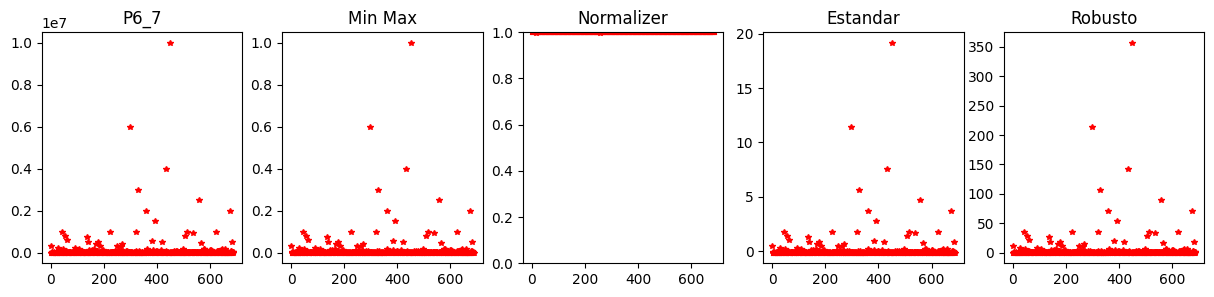

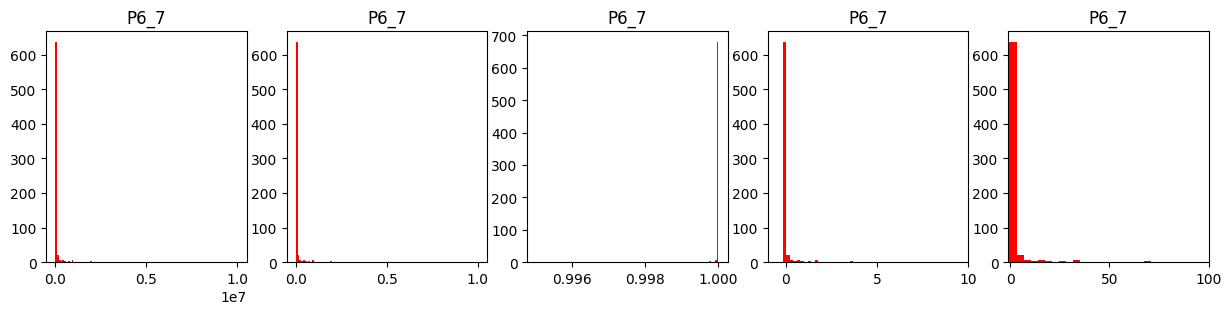

In [11]:
# Ahora voy a hacer los datos escalados data frames de pandas para poder manipularlos de
# manera más sencilla.
datos_min_max = pd.DataFrame(datos_min_max, columns=['P6_5', 'P6_7'])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=['P6_5', 'P6_7'])
datos_estandar = pd.DataFrame(datos_estandar, columns=['P6_5', 'P6_7'])
datos_robusto = pd.DataFrame(datos_robusto, columns=['P6_5', 'P6_7'])

# Voy a comparar los métodos de manera gráfica
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Crea y personaliza las series de datos
ax1.set_title('P6_7')
ax1.plot(datos['P6_7'], linewidth=0, marker="*", color='red', markersize=4)

ax2.set_title('Min Max')
ax2.plot(datos_min_max['P6_7'], linewidth=0, marker="*", color='red', markersize=4)

ax3.set_title('Normalizer')
ax3.plot(datos_normalizer['P6_7'], linewidth=0, marker="*", color='red', markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title('Estandar')
ax4.plot(datos_estandar['P6_7'], linewidth=0, marker="*", color='red', markersize=4)

ax5.set_title('Robusto')
ax5.plot(datos_robusto['P6_7'], linewidth=0, marker="*", color='red', markersize=4)

plt.show()

# Voy a hacer algo similar pero con histogramas para ver la manera en la que cambia
# la distribución.
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Aquí pongo los histogramas
ax1.set_title('P6_7')
ax1.hist(datos['P6_7'], bins=100, color='red')
ax2.set_title('P6_7')
ax2.hist(datos_min_max['P6_7'], bins=100, color='red')
ax3.set_title('P6_7')
ax3.hist(datos_normalizer['P6_7'], bins=100, color='red')
ax4.set_title('P6_7')
ax4.hist(datos_estandar['P6_7'], bins=100, color='red')
ax4.set_xlim(-1, 10)
ax5.set_title('P6_7')
ax5.hist(datos_robusto['P6_7'], bins=100, color='red')
ax5.set_xlim(-1, 100)
plt.show()

# Algo similar ocurre para la otra variable

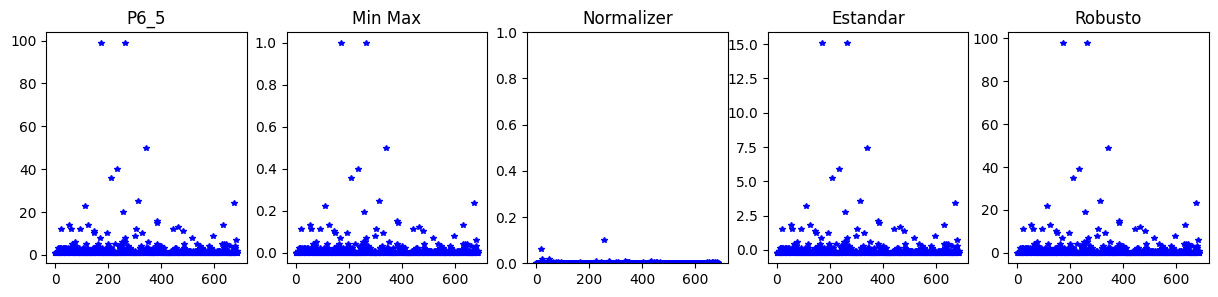

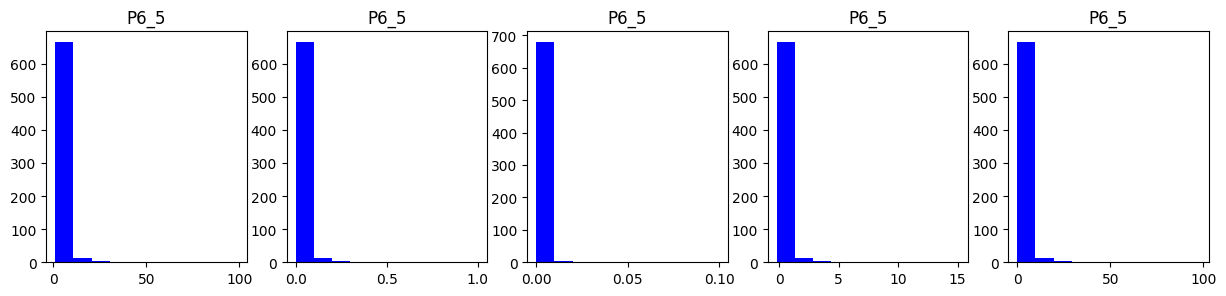

In [12]:
# Voy a comparar los métodos de manera gráfica
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Crea y personaliza las series de datos
ax1.set_title('P6_5')
ax1.plot(datos['P6_5'], linewidth=0, marker="*", color='blue', markersize=4)

ax2.set_title('Min Max')
ax2.plot(datos_min_max['P6_5'], linewidth=0, marker="*", color='blue', markersize=4)

ax3.set_title('Normalizer')
ax3.plot(datos_normalizer['P6_5'], linewidth=0, marker="*", color='blue', markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title('Estandar')
ax4.plot(datos_estandar['P6_5'], linewidth=0, marker="*", color='blue', markersize=4)

ax5.set_title('Robusto')
ax5.plot(datos_robusto['P6_5'], linewidth=0, marker="*", color='blue', markersize=4)

plt.show()

# Voy a hacer algo similar pero con histogramas para ver la manera en la que cambia
# la distribución.
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Aquí pongo los histogramas
ax1.set_title('P6_5')
ax1.hist(datos['P6_5'], color='blue')
ax2.set_title('P6_5')
ax2.hist(datos_min_max['P6_5'], color='blue')
ax3.set_title('P6_5')
ax3.hist(datos_normalizer['P6_5'], color='blue')
ax4.set_title('P6_5')
ax4.hist(datos_estandar['P6_5'], color='blue')
#ax4.set_xlim(-1, 10)
ax5.set_title('P6_5')
ax5.hist(datos_robusto['P6_5'], color='blue')
#ax5.set_xlim(-1, 100)
plt.show()

In [13]:
# Ahora voy a usar los iTREES
from sklearn.ensemble import IsolationForest


# En principio ya tengo mis datos cargados y estandarizados. En este caso voy a
# trabajar con los del estandarizador robusto
resultados = np.zeros(datos_robusto.shape[0])


In [14]:
# Los iforest requieren de conocer el nivel de contaminación
# para efectos de la prueba voy a poner 3 escenarios
c = [ 0.01, 0.05, 0.1]

for i in range(len(c)):
  modelo = IsolationForest(contamination=c[i]).fit(datos_robusto)

resultados = modelo.predict(datos_robusto)

<Figure size 640x480 with 0 Axes>

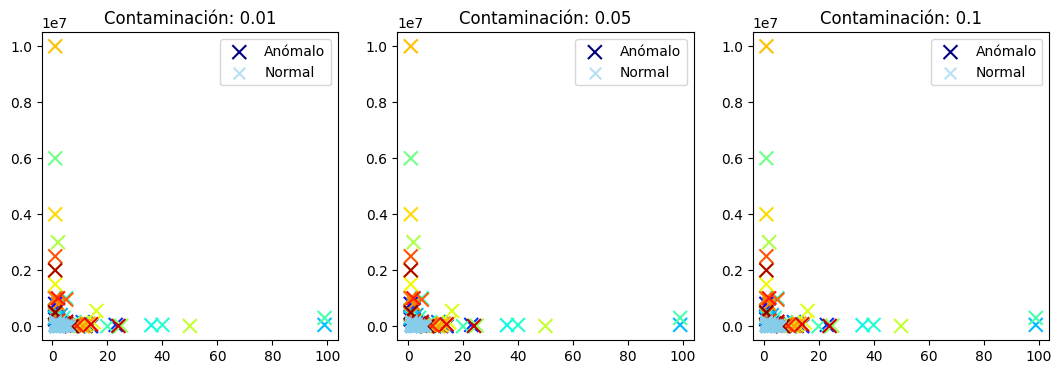

In [15]:
import matplotlib.pyplot as plt

# Voy a hacer la gráfica del modelo donde los datos anomalos sean marcados con una cruz y con colores
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):
  ax = fig.add_subplot(1, 3, i + 1)

  # Filter data based on anomaly detection results
  anomalous_data = datos[resultados == -1]  # Select rows where resultados is -1
  normal_data = datos[resultados == 1]  # Select rows where resultados is 1

  # Scatter plot for anomalous data points with cross markers and colors
  ax.scatter(anomalous_data.iloc[:, 0],
             anomalous_data.iloc[:, 1],
             c=range(anomalous_data.shape[0]), marker="x", s=100, label="Anómalo")  # Use 'x' for cross marker

  # Scatter plot for normal data points using 'c' instead of 'color'
  ax.scatter(normal_data.iloc[:, 0],
             normal_data.iloc[:, 1],
             color = "skyblue", # Use 'c' for color mapping and data shape for range
             marker="x", s=70, alpha=0.6, label="Normal")

  # Add legend to distinguish data points
  ax.legend()

  # Set title with contamination value
  ax.set_title(f"Contaminación: {c[i]}")

plt.show()

In [16]:
# Cargo mi nuevo conjunto de datos
data = pd.read_csv('/content/sample_data/dataset2.csv')
print(data.shape)
mis_datos2 = data.iloc[:,1:6]
mis_datos2.head(10)
datos2 = mis_datos2.iloc[:,2:4]
#datos.head(10)

(689, 5)


In [17]:
# Lo estandarizo
datos_robusto2 = preprocessing.RobustScaler().fit_transform(datos2)
datos_robusto2 = pd.DataFrame(datos_robusto2, columns=['P6_5', 'P6_7'])

In [18]:
# Con la información del modelo que ya tengo voy a ver si se hace la predicción
resultados = modelo.predict(datos_robusto2)


<Figure size 640x480 with 0 Axes>

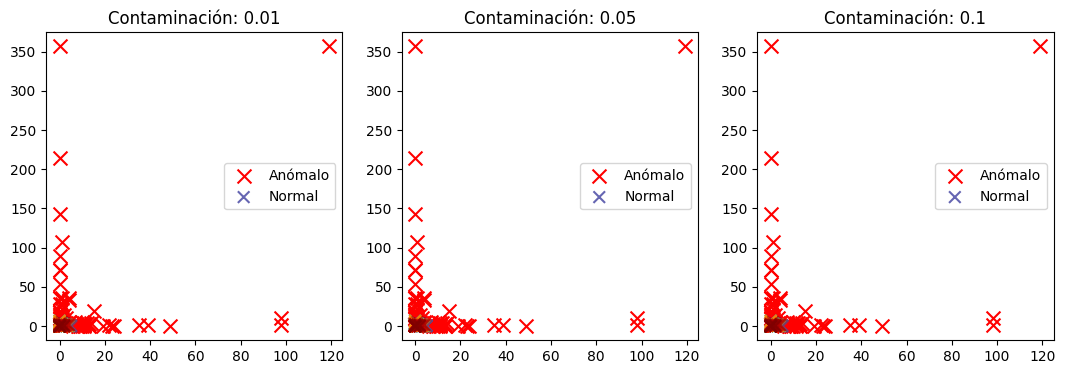

In [19]:
import matplotlib.pyplot as plt

# Voy a hacer la gráfica del modelo donde los datos anomalos sean marcados con una cruz y con colores
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):
  ax = fig.add_subplot(1, 3, i + 1)

  # Filter data based on anomaly detection results
  anomalous_data = datos_robusto2[resultados == -1]  # Select rows where resultados is -1
  normal_data = datos_robusto2[resultados == 1]  # Select rows where resultados is 1

  # Scatter plot for anomalous data points with cross markers and colors
  ax.scatter(anomalous_data.iloc[:, 0],
             anomalous_data.iloc[:, 1],
             color = "red", marker="x", s=100, label="Anómalo")  # Use 'x' for cross marker

  # Scatter plot for normal data points using 'c' instead of 'color'
  ax.scatter(normal_data.iloc[:, 0],
             normal_data.iloc[:, 1],
             c=range(normal_data.shape[0]), # Use 'c' for color mapping and data shape for range
             marker="x", s=70, alpha=0.6, label="Normal")

  # Add legend to distinguish data points
  ax.legend()

  # Set title with contamination value
  ax.set_title(f"Contaminación: {c[i]}")

plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1300x400 with 0 Axes>

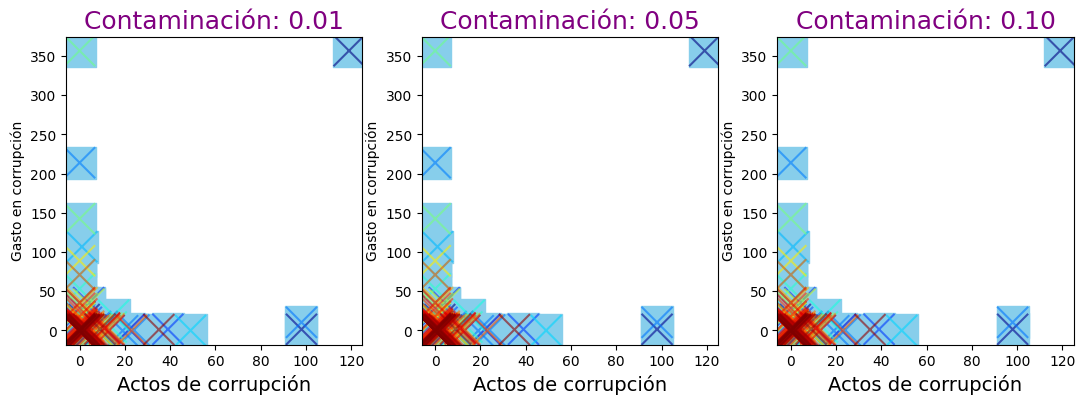

In [23]:
import matplotlib.pyplot as plt

# Voy a hacer la gráfica del modelo donde los datos anomalos sean marcados con una cruz
# y con colores. La cajita en azul marca los malos.
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

# Graficar datos anómalos
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):
    ax = fig.add_subplot(1, 3, i + 1)

    # Filter data for anomalous points
    anomalous_data = datos_robusto2[resultados== -1]

    # Access data using column names instead of numerical indices
    ax.scatter(anomalous_data['P6_5'],  # Use column name 'P6_5'
               anomalous_data['P6_7'],  # Use column name 'P6_7'
               c="skyblue", marker="s", s=500)

    ax.scatter(datos_robusto2['P6_5'],  # Use column name 'P6_5'
               datos_robusto2['P6_7'],  # Use column name 'P6_7'
               c=range(datos_robusto2.shape[0]), marker="x",
               s=500, alpha=0.6)

    ax.set_title("Contaminación: %0.2f" % c[i], size=18, color="purple")
    ax.set_ylabel("Gasto en corrupción", size=10)
    ax.set_xlabel("Actos de corrupción", size=14)

plt.show()

In [21]:
#Veo que onda con mis datos. O sea el primer acercamiento
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

# Cargar los datos desde el archivo datos2.csv
data = pd.read_csv('/content/sample_data/dataset2.csv')
print(data.shape)
mis_datos2 = data.iloc[:,0:6]
mis_datos2.head(10)
datos2 = mis_datos2.iloc[:,[0,3,4]]
datos2.head(10)

(689, 5)


,CONSEC,P6_5,P6_7
0,1,120,10000000
1,93,1,30000
2,149,1,5000
3,306,2,400
4,369,3,400000
5,456,1,300
6,596,4,3000
7,606,1,500
8,746,8,72000
9,809,2,1000


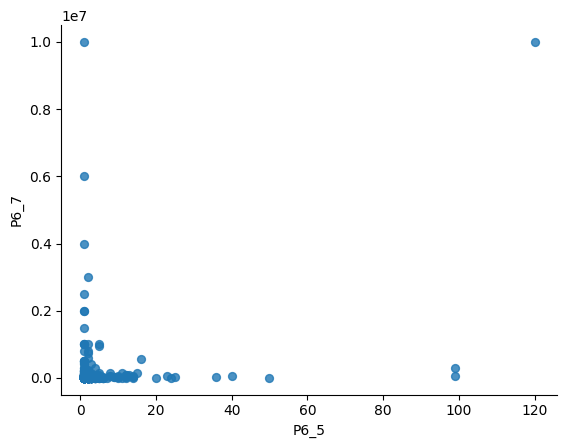

In [24]:
# @title P6_5 vs P6_7

from matplotlib import pyplot as plt
datos2.plot(kind='scatter', x='P6_5', y='P6_7', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

# Cargar los datos desde el archivo datos2.csv
data = pd.read_csv('/content/sample_data/dataset2.csv')
print(data.shape)
mis_datos2 = data.iloc[:,0:6]
mis_datos2.head(10)
datos2 = mis_datos2.iloc[:,[0,3,4]]
datos2.head(10)

# Estandarizar los datos utilizando RobustScaler
# Instead of directly assigning the output to datos_robusto2, create a DataFrame
datos_robusto2 = pd.DataFrame(preprocessing.RobustScaler().fit_transform(mis_datos2),
                             columns=mis_datos2.columns)  # Use mis_datos2 columns

# Get the column names from 'mis_datos2'
column_names = mis_datos2.columns.tolist()

#If you only want the scaled values of 'P6_5' and 'P6_7' then select those columns
datos_robusto2 = datos_robusto2[['P6_5', 'P6_7']] # Now this should work as datos_robusto2 is a DataFrame

# Agregar una nueva columna al DataFrame original para indicar si un dato es anómalo o no
datos2['anomalo'] = resultados

# Guardar el DataFrame modificado en un nuevo archivo CSV
datos2.to_csv('datos2_con_anomalias.csv', index=False)

print("Se ha creado el archivo 'datos2_con_anomalias.csv' con una columna 'anomalo' que indica si un dato es anómalo (-1) o no (1).")

(689, 5)
Se ha creado el archivo 'datos2_con_anomalias.csv' con una columna 'anomalo' que indica si un dato es anómalo (-1) o no (1).


<ipython-input-22-dd21bff9e40d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos2['anomalo'] = resultados
